# Case study on Unsupervised Learning



Do the following in the wine dataset.

1.Read the dataset to the python environment.

2.Try out different clustering models in the wine dataset.

3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [96]:
import warnings
warnings.filterwarnings ('ignore')

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [98]:
#Read the data
df=pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [99]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [100]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [101]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

<AxesSubplot:xlabel='Alcohol'>

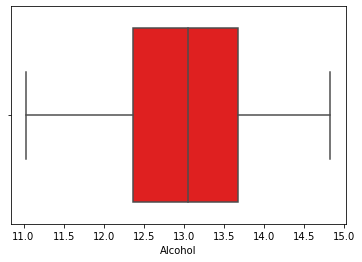

In [102]:
sns.boxplot(df["Alcohol"],color="red")

<AxesSubplot:xlabel='Malic_Acid'>

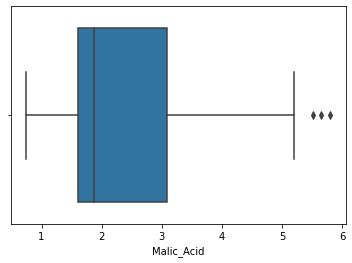

In [103]:
sns.boxplot(df["Malic_Acid"])

In [104]:
Q1=np.percentile(df['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(df['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(df['Malic_Acid'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Malic_Acid']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  1.605
Q2 =  1.8650000000000002
Q3 =  3.065

Lower limit =  -0.585
Upper limit =  5.255
outlier [5.8, 5.51, 5.65]


In [105]:
ind1 = df[(df["Malic_Acid"] < low_limit) | (df["Malic_Acid"] > up_limit)].index
df.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [106]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='Malic_Acid'>

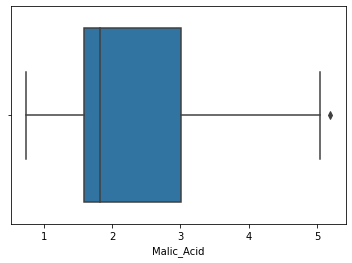

In [107]:
sns.boxplot(df["Malic_Acid"])

<AxesSubplot:xlabel='Ash'>

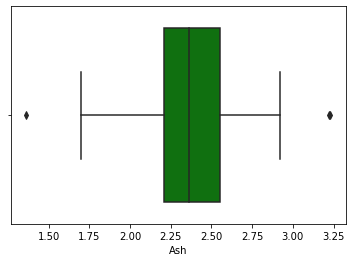

In [108]:
sns.boxplot(df["Ash"],color="green")

In [109]:
Q1=np.percentile(df['Ash'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Ash']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  2.21
Q2 =  2.36
Q3 =  2.5549999999999997

Lower limit =  1.6925000000000003
Upper limit =  3.0724999999999993
outlier [3.22, 1.36, 3.23]


In [110]:
ind1 = df[(df["Ash"] < low_limit) | (df["Ash"] > up_limit)].index
df.loc[ind1].index

Int64Index([25, 59, 121], dtype='int64')

In [111]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='Ash'>

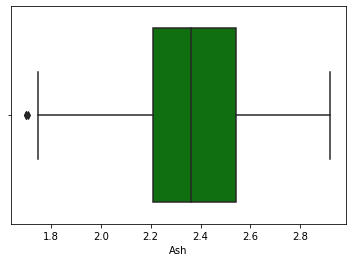

In [112]:
sns.boxplot(df["Ash"],color="green")

<AxesSubplot:xlabel='Ash_Alcanity'>

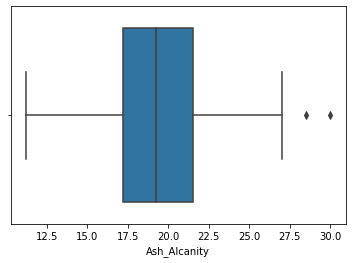

In [113]:
sns.boxplot(df["Ash_Alcanity"])

In [114]:
Q1=np.percentile(df['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(df['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(df['Ash_Alcanity'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Ash_Alcanity']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  17.15
Q2 =  19.25
Q3 =  21.5

Lower limit =  10.624999999999996
Upper limit =  28.025000000000002
outlier [30.0, 28.5]


<AxesSubplot:xlabel='Magnesium'>

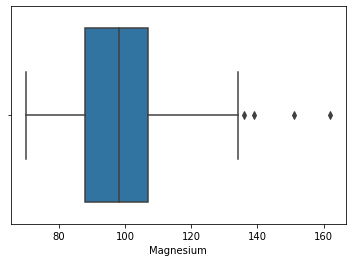

In [115]:
sns.boxplot(df["Magnesium"])

In [116]:
Q1=np.percentile(df['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(df['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(df['Magnesium'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Magnesium']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  88.0
Q2 =  98.0
Q3 =  107.0

Lower limit =  59.5
Upper limit =  135.5
outlier [151, 139, 136, 162]


In [117]:
ind1 = df[(df["Magnesium"] < low_limit) | (df["Magnesium"] > up_limit)].index
df.loc[ind1].index

Int64Index([69, 73, 78, 95], dtype='int64')

In [118]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='Magnesium'>

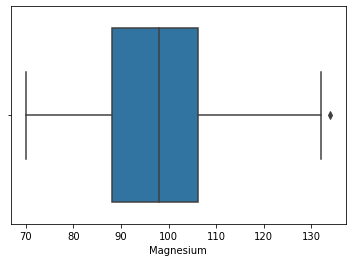

In [119]:
sns.boxplot(df["Magnesium"])

<AxesSubplot:xlabel='Flavanoids'>

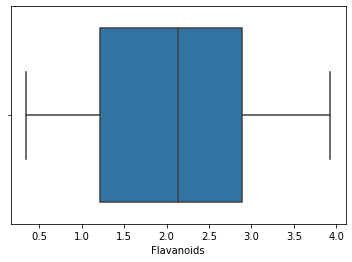

In [120]:
sns.boxplot(df["Flavanoids"])

<AxesSubplot:xlabel='Proanthocyanins'>

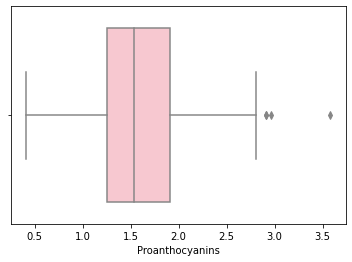

In [121]:
sns.boxplot(df["Proanthocyanins"],color="pink")

In [122]:
Q1=np.percentile(df['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(df['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(df['Proanthocyanins'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Proanthocyanins']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  1.25
Q2 =  1.54
Q3 =  1.9249999999999998

Lower limit =  0.23750000000000027
Upper limit =  2.9374999999999996
outlier [2.96, 3.58]


In [123]:
ind1 = df[(df["Proanthocyanins"] < low_limit) | (df["Proanthocyanins"] > up_limit)].index
df.loc[ind1].index

Int64Index([14, 110], dtype='int64')

In [124]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='Proanthocyanins'>

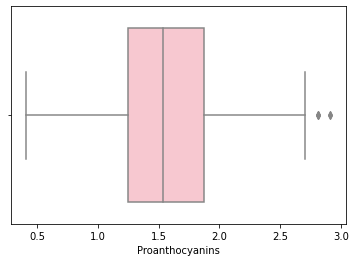

In [125]:
sns.boxplot(df["Proanthocyanins"],color="pink")

<AxesSubplot:xlabel='Color_Intensity'>

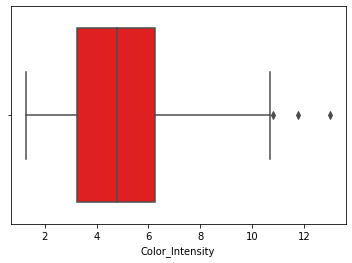

In [126]:
sns.boxplot(df["Color_Intensity"],color="red")

In [127]:
Q1=np.percentile(df['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(df['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(df['Color_Intensity'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Color_Intensity']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  3.26
Q2 =  4.8
Q3 =  6.225

Lower limit =  -1.1875
Upper limit =  10.6725
outlier [10.8, 13.0, 11.75, 10.68]


In [128]:
ind1 = df[(df["Color_Intensity"] < low_limit) | (df["Color_Intensity"] > up_limit)].index
df.loc[ind1].index

Int64Index([151, 158, 159, 166], dtype='int64')

In [129]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='Color_Intensity'>

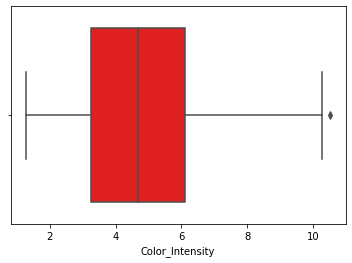

In [130]:
sns.boxplot(df["Color_Intensity"],color="red")

<AxesSubplot:xlabel='Proline'>

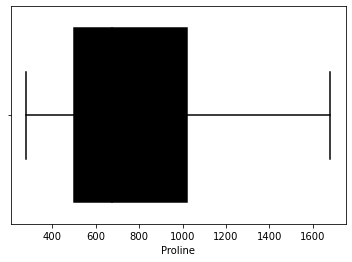

In [131]:
sns.boxplot(df["Proline"],color="black")

<AxesSubplot:xlabel='Hue'>

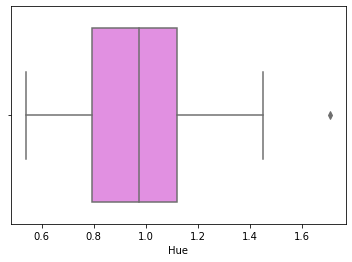

In [132]:
sns.boxplot(df["Hue"],color="violet")

<AxesSubplot:xlabel='OD280'>

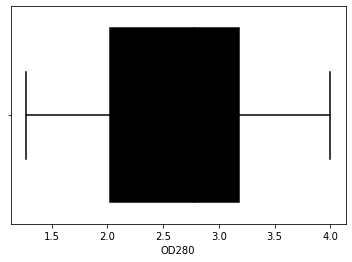

In [133]:
sns.boxplot(df["OD280"],color="black")

<AxesSubplot:>

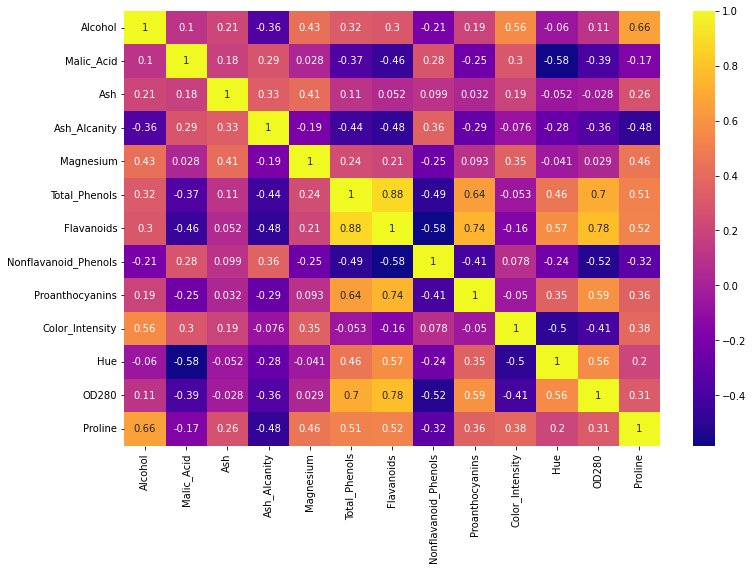

In [134]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot = True, cmap = "plasma")

In [135]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(df)

In [136]:
scaleddf=pd.DataFrame(scaled,columns=df.columns)
#print scaled dataset
scaleddf.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.509142,-0.568954,0.269316,-1.235602,2.318292,0.827052,1.053979,-0.658921,1.457310,0.318153,0.347144,1.835643,0.990436
1,0.232964,-0.501851,-0.927702,-2.686091,0.130545,0.586538,0.745219,-0.821767,-0.514451,-0.277640,0.391833,1.097496,0.943233
2,0.183404,0.054144,1.259952,-0.246632,0.211572,0.827052,1.239236,-0.496076,2.472474,0.337067,0.302454,0.771007,1.368064
3,1.682604,-0.338887,0.558252,-0.840014,1.183904,2.510652,1.496536,-0.984612,1.242564,1.339513,-0.457268,1.168471,2.296398
4,0.282524,0.274625,2.085482,0.544544,1.589043,0.827052,0.673175,0.236729,0.539758,-0.306011,0.347144,0.430323,-0.048039


# kmeans

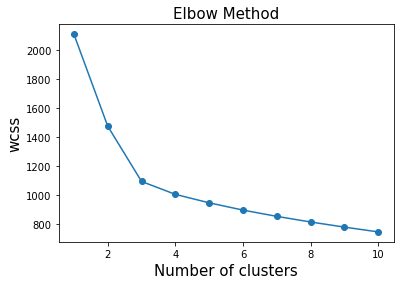

In [138]:

from sklearn .cluster import KMeans
WCSS=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(scaleddf)
    WCSS.append(kmean.inertia_)
plt.plot(range(1,11),WCSS,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.show()

In [139]:
#prediction
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(scaleddf)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds

In [141]:
kmeans_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [142]:
print(f'Silhouette Score(n=3): {silhouette_score( scaleddf,y_kmeans)}')

Silhouette Score(n=3): 0.30017343064582913


In [143]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaleddf)
x_pca = pca.transform(scaleddf)
x_pca.shape

(162, 2)

In [153]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(x_pca)
label_pca = kmeans_pca.predict(x_pca)

print(label_pca)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [154]:
from sklearn.metrics import silhouette_score

In [155]:
print(f'Silhouette Score(n=3): {silhouette_score( scaleddf,label_pca)}')

Silhouette Score(n=3): 0.30017343064582913


# Agglomerative Hierarchical model (AHC)

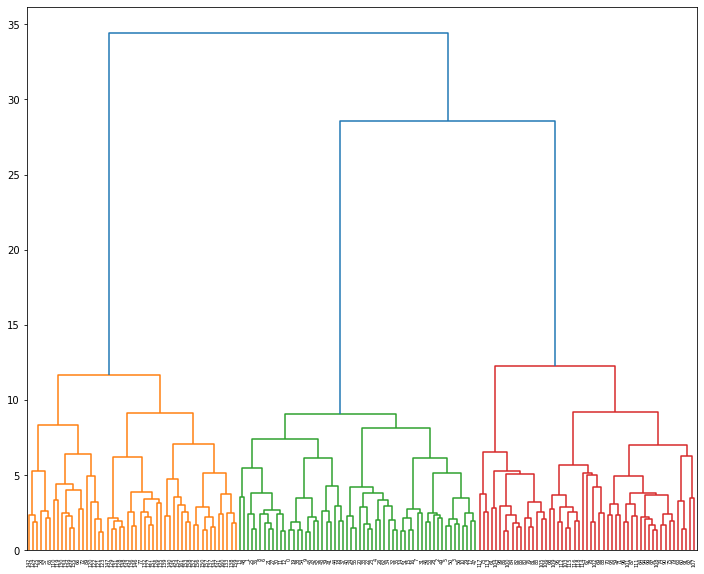

In [147]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(scaleddf, method = "ward")
plt.figure(figsize=(12,10))
dendrogram(linked,orientation="top",distance_sort="ascending", show_leaf_counts=True)
plt.show()

In [148]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
ahclusters=cluster.fit_predict(scaleddf)
ahclusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

From the above we can take 3 as the optimum number of clusters for the Scaled data.

In [149]:
print(f'Silhouette Score(n=3): {silhouette_score(scaleddf,ahclusters)}')

Silhouette Score(n=3): 0.29586986364356155


In [150]:
# doing PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
pca1.fit(scaleddf)
y_pca = pca.transform(scaleddf)
y_pca.shape

(162, 2)

In [151]:
ahc_pca = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
ahclabel_pca = ahc_pca.fit_predict(y_pca)
print(ahclabel_pca)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [152]:
print(f'Silhouette Score(n=3): {silhouette_score( scaleddf,ahclabel_pca)}')

Silhouette Score(n=3): 0.28543875637863814


Conclusion

The Silhouette score for the Models were as given below :

KMeans Model (Scaled and n=3) = 0.3001

KMeans Model (After PCA and n = 3) = 0.3001

AHC Model (Scaled and n=3) = 0.2958

AHC Model (After PCA and n = 2 ) = 0.285

After comparing the models we can coclude that the Kmeans model is good